# Optimization with Genetic Algorithms

In this example we are going to use **Pymoo** package that includes many algorithms for sigle and multi-objetive optimization, and tools for visualization as well.

Let's to start by creating some test function as objetive function for single-objetive optimization.

## Single-objetive optimization

### Rastringin function

The rastringin function is a non-convex function, was first proposed by Rastringin in 1974 as a 2-dimensional function, after that has been generalized by Rudolph.

Given an n-dimensional vector $X = [x_1, x_2, \ldots, x_n]^T$ the Rastringin function is defined by:

$$f(X) = \omega n + \sum_{i=1}^n [x_i^2 - \omega\cos(2\pi x_i)]$$

where $\omega=10$ and $x_i \in [-5.12, 5.12]$.

The global minimum is at $X = 0$ where $f(X) = 0$

Let's make some importation to create the function and visualizing

In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [48]:
def rastringinFunction(X):

    A = 10 * len(X)
    B = np.power(X, 2) - 10 * np.cos(2 * np.pi * X)

    f = A + np.sum(B)

    return f

In [20]:
def rastringinFunction2D(x_1, x_2):
    A = 10 * 2
    B = x_1**2 - 10 * np.cos(2 * np.pi * x_1)
    C = x_2**2 - 10 * np.cos(2 * np.pi * x_2)

    f = A + B + C

    return f

Now we need some $x_1$ and $x_2$ values for evaluating the function and plot it

In [143]:
# Create some points
x_1 = np.linspace(-5.12, 5.12, 1000)
x_2 = np.linspace(-5.12, 5.12, 1000)

# Create a mesh to plot the surface
X1, X2 = np.meshgrid(x_1, x_2)

# Compute f(X)
Z = rastringinFunction2D(X1, X2)

Let's visualize the function

In [141]:
def plot2D(X1, X2, Z, ax, optimum=None):

    ax.contour(X1, X2, Z, levels=10, colors='white', linewidths=0.6)
    countoursColor = ax.contourf(X1, X2, Z, levels=20)

    cbar = plt.colorbar(countoursColor)
    cbar.set_label(r'$f(x, y)$', rotation=0, ha='left', fontsize=14)

    if optimum is not None:
        ax.scatter(optimum[0], optimum[1], c='white', edgecolors='black', linewidths=0.5, s=40)

    ax.set_xlabel(r'$x_1$', fontsize=14)
    ax.set_ylabel(r'$x_2$', fontsize=14)

In [162]:
from mpl_toolkits.mplot3d import Axes3D

def plot3D(X1, X2, Z, ax):
    ax.plot_surface(X1, X2, Z, cmap='viridis')

    # set the axes labels
    ax.set_xlabel(r'$x_1$')
    ax.set_ylabel(r'$x_2$')
    ax.set_zlabel('Z')

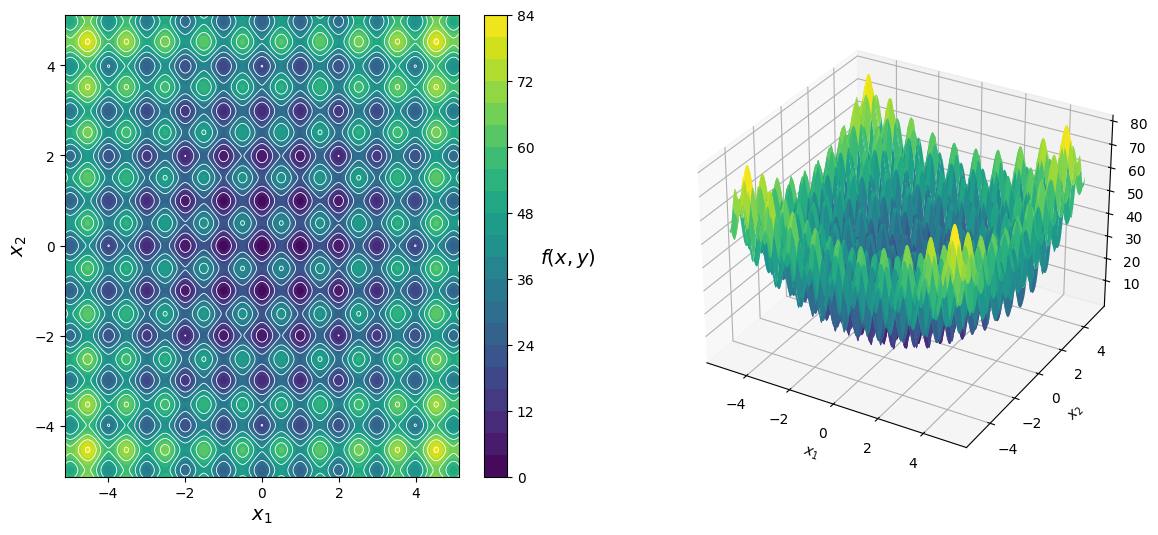

In [164]:
fig = plt.figure(figsize=(14, 6))

ax = fig.add_subplot(1, 2, 1)
plot2D(X1, X2, Z, ax=ax, optimum=None)

ax = fig.add_subplot(1, 2, 2, projection='3d')
plot3D(X1, X2, Z, ax=ax)

### Define the problem using **Pymoo**

**Pymoo** requires the optimization problem to be defined as an object, to do that we use the class `ElementWise` from `pymoo.core.problem`:

In [37]:
from pymoo.core.problem import ElementwiseProblem

# Define here the problem
class rastringinProblem(ElementwiseProblem):

    def __init__(self, numberVariables):
        """ 
        n_obj: Number of objetives (for single-objetive n_obj=1)
        xl: Lower boundary (-5.12)
        xu: Upper boundary (5.12) 
        """
        xl = -5.12 * np.ones(numberVariables)
        xu = 5.12 * np.ones(numberVariables)

        super().__init__(n_var=numberVariables, n_eq_constr=0, n_ieq_constr=0, n_obj=1, xl=xl, xu=xu)

    def _evaluate(self, x, out, *args, **kwargs):
        """Here we write the objetive function and constraints"""
        out['F'] = rastringinFunction(x)

In [97]:
nVariables = 2

# Instantiate the problem
problem = rastringinProblem(nVariables)

### Selecting the algorithm

**Pymoo** offers many algorithms for both single objetive optimization and multiobjetive optimization.

#### Single-objetive algorithms

* Genetic Algorithm -> **GA**
* Differential Evolution -> **DE**
* Pattern Search -> **PatternSearch**

In this problem we're going to use a Genetic Algorithm with Tournament Selection, Simulated Binary Crossover (SBX) and Polynomial Mutation. The **GA** class from `pymoo.algorithms.soo.nonconvex.ga` has already included this genetic operators.

In [89]:
from pymoo.algorithms.soo.nonconvex.ga import GA

# Hyperparameters of the Genectic Algorithm
populationSize = 30


algorithm = GA(
    pop_size=populationSize,
    eliminate_duplicates=True
)

### Termination criterion

For this problem the termination criterion will be when evolutive process reaches 100 generations

In [90]:
from pymoo.termination import get_termination

numberGenerations = 100

termination = get_termination('n_gen', numberGenerations)

### Optimization process

To start the optimization process we use the `minimize()` function that receives as paramaters the **problem**, **algorithm**, and others paramaters such as the termination criterion, the seed to make reproducibility, etc

In [166]:
from pymoo.optimize import minimize

results = minimize(
    problem, 
    algorithm,
    termination,
    verbose=True
)

n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       30 |  3.910547E+01 |  1.344080E+01
     2 |       60 |  2.359821E+01 |  1.214333E+01
     3 |       90 |  1.690479E+01 |  2.8903030680
     4 |      120 |  1.265860E+01 |  0.3548380031
     5 |      150 |  9.1321382161 |  0.3548380031
     6 |      180 |  5.3565454269 |  0.3548380031
     7 |      210 |  3.5100673740 |  0.3548380031
     8 |      240 |  2.3848131021 |  0.0943387616
     9 |      270 |  1.8510142783 |  0.0943387616
    10 |      300 |  1.3672418601 |  0.0943387616
    11 |      330 |  0.9611431709 |  0.0943387616
    12 |      360 |  0.5890890962 |  0.0903446527
    13 |      390 |  0.4620545631 |  0.0903446527
    14 |      420 |  0.3246668355 |  0.0903446527
    15 |      450 |  0.2572030746 |  0.0903446527
    16 |      480 |  0.1842014394 |  0.0201953717
    17 |      510 |  0.1484051870 |  0.0201953717
    18 |      540 |  0.1271930011 |  0.0201953717
    19 |      570 |  0.1091616950 |  0.0167183071


### Show the results

In [167]:
X, F = results.X, results.F

X_analytical = np.zeros(nVariables)

print('Results: \n')
print(f'Population size: {populationSize}, Number of generations: {numberGenerations} \n')
print('Minimum:')
print(f'Analytical: 0.00, GA: {F[0]:.6f}')
print('X')
print(f'Analytical: {X_analytical}, GA: {X}')

Results: 

Population size: 30, Number of generations: 100 

Minimum:
Analytical: 0.00, GA: 0.000103
X
Analytical: [0. 0.], GA: [ 0.00064157 -0.00032608]


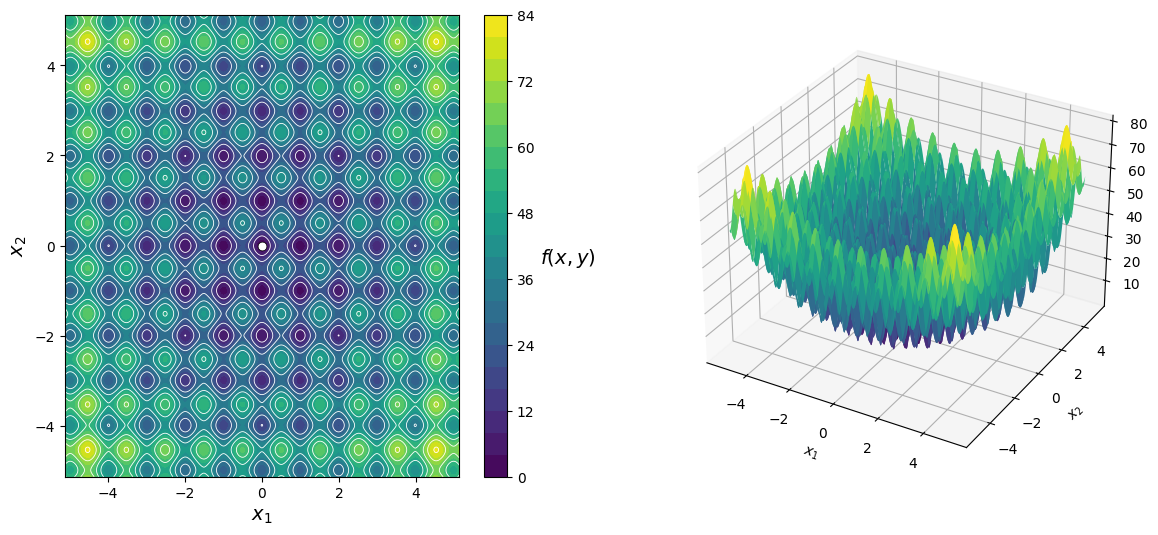

In [168]:
fig = plt.figure(figsize=(14, 6))

ax = fig.add_subplot(1, 2, 1)
plot2D(X1, X2, Z, ax=ax, optimum=X)

ax = fig.add_subplot(1, 2, 2, projection='3d')
plot3D(X1, X2, Z, ax=ax)